## SVM 이론
 [abydos](https://abydos.readthedocs.io/en/latest/abydos.distance.html)    
 [SVM tutorial](https://www.svm-tutorial.com/2016/09/duality-lagrange-multipliers/)    
 [SVM for beginners](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/)    
### SVM 회귀

In [87]:
import numpy as np

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [3]:
from sklearnex import patch_sklearn, unpatch_sklearn

patch_sklearn()

from sklearn.svm import LinearSVR

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
import matplotlib.pyplot as plt

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    # regression + epsilon 검은색 점선
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    # regression - epsiolon 검은색 점선
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    # support vector 색칠하기
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes) # xmin, xmax, ymin, ymax

In [ ]:
# epsilon 거리 밖에 위치한 값 찾기
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    # epsilon보다 큰 거리에 위치한 값의 인덱스 = margin 밖에 위치한 값의 인덱스
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon) 
    return np.argwhere(off_margin)

### epsilon에 따른 차이

In [61]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg3 = LinearSVR(epsilon=0.0, random_state=42) # default
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)
svm_reg3.fit(X, y)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
svm_reg3.support_ = find_support_vectors(svm_reg3, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

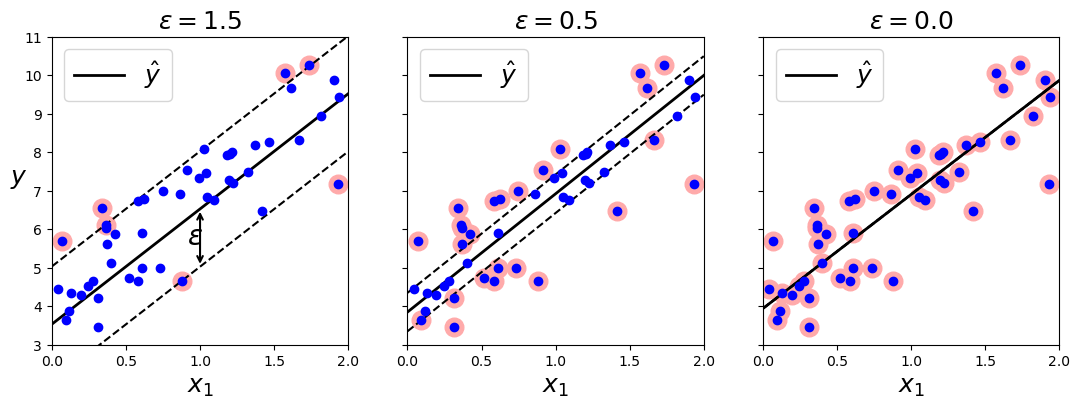

In [62]:
fig, axes = plt.subplots(ncols=3, figsize=(13, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg1.epsilon}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, "$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg2.epsilon}$", fontsize=18)
plt.sca(axes[2])
plot_svm_regression(svm_reg3, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg3.epsilon}$", fontsize=18)
plt.show()

In [70]:
print(f"model 1: intercept {svm_reg1.intercept_} | coefficient {svm_reg1.coef_}")
print(f"model 2: intercept {svm_reg2.intercept_} | coefficient {svm_reg2.coef_}")
print(f"model 3: intercept {svm_reg3.intercept_} | coefficient {svm_reg3.coef_}")

model 1: intercept [3.53362371] | coefficient [2.99278375]
model 2: intercept [3.84819445] | coefficient [3.07342589]
model 3: intercept [3.94306809] | coefficient [2.96224289]


### tol 에 따른 차이

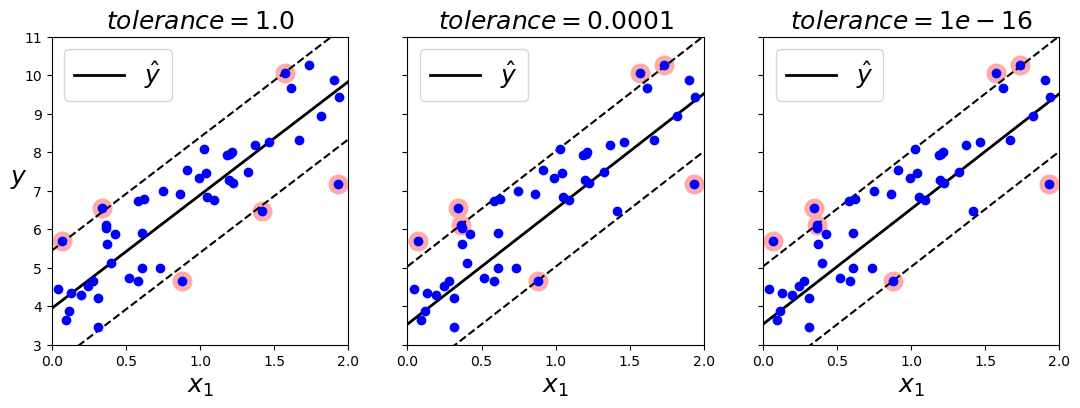

In [71]:
svm_reg1 = LinearSVR(epsilon=1.5, tol=1.0, max_iter=100000, random_state=42)
svm_reg2 = LinearSVR(epsilon=1.5, tol=1e-4, max_iter=100000, random_state=42) # default
svm_reg3 = LinearSVR(epsilon=1.5, tol=1e-16, max_iter=100000, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)
svm_reg3.fit(X, y)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
svm_reg3.support_ = find_support_vectors(svm_reg3, X, y)

fig, axes = plt.subplots(ncols=3, figsize=(13, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(f"$tolerance = {svm_reg1.tol}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"$tolerance = {svm_reg2.tol}$", fontsize=18)
plt.sca(axes[2])
plot_svm_regression(svm_reg3, X, y, [0, 2, 3, 11])
plt.title(f"$tolerance = {svm_reg3.tol}$", fontsize=18)
plt.show()

In [72]:
print(f"model 1: intercept {svm_reg1.intercept_} | coefficient {svm_reg1.coef_}")
print(f"model 2: intercept {svm_reg2.intercept_} | coefficient {svm_reg2.coef_}")
print(f"model 3: intercept {svm_reg3.intercept_} | coefficient {svm_reg3.coef_}")

model 1: intercept [3.94717647] | coefficient [2.94209168]
model 2: intercept [3.53362371] | coefficient [2.99278375]
model 3: intercept [3.53362371] | coefficient [2.99278375]


### C에 따른 차이

> C가 크면 규제가 없음

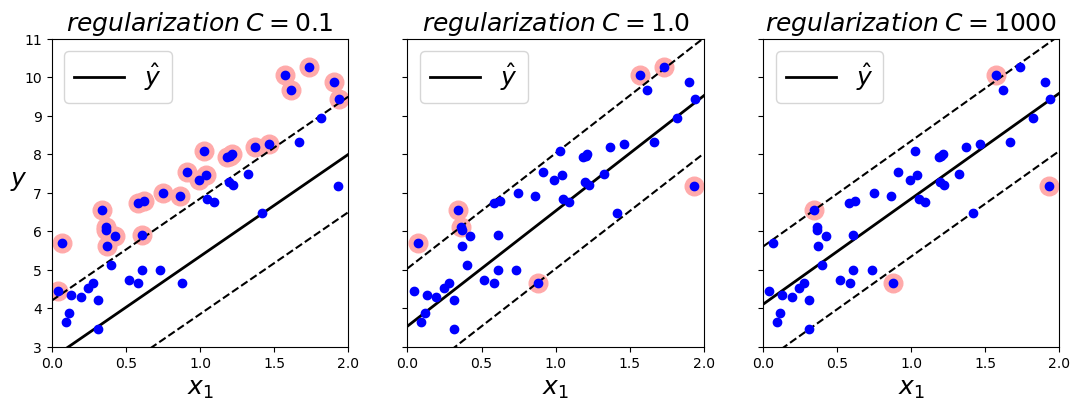

In [88]:
svm_reg1 = LinearSVR(epsilon=1.5, C=0.1, max_iter=100000, random_state=42)
svm_reg2 = LinearSVR(epsilon=1.5, C=1.0, max_iter=100000, random_state=42) # default
svm_reg3 = LinearSVR(epsilon=1.5, C=1000, max_iter=100000, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)
svm_reg3.fit(X, y)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
svm_reg3.support_ = find_support_vectors(svm_reg3, X, y)

fig, axes = plt.subplots(ncols=3, figsize=(13, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(f"$regularization \; C = {svm_reg1.C}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"$regularization \; C = {svm_reg2.C}$", fontsize=18)
plt.sca(axes[2])
plot_svm_regression(svm_reg3, X, y, [0, 2, 3, 11])
plt.title(f"$regularization \; C = {svm_reg3.C}$", fontsize=18)
plt.show()

In [89]:
print(f"model 1: intercept {svm_reg1.intercept_} | coefficient {svm_reg1.coef_}")
print(f"model 2: intercept {svm_reg2.intercept_} | coefficient {svm_reg2.coef_}")
print(f"model 3: intercept {svm_reg3.intercept_} | coefficient {svm_reg3.coef_}")

model 1: intercept [2.7] | coefficient [2.64681384]
model 2: intercept [3.53362371] | coefficient [2.99278375]
model 3: intercept [4.10200513] | coefficient [2.74193111]


### 비선형 회귀

In [78]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [79]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

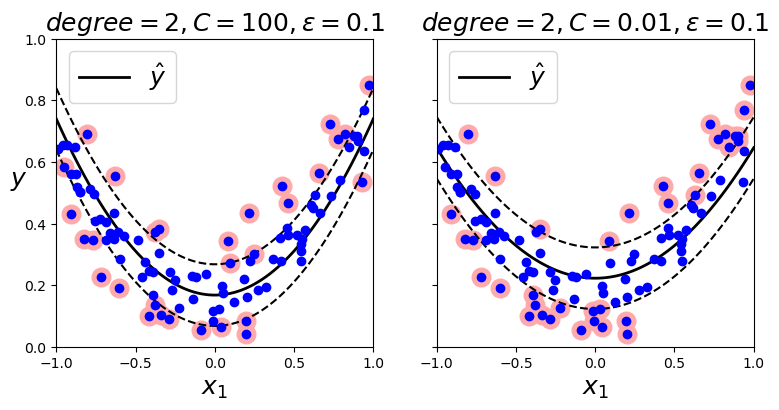

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon = {svm_poly_reg1.epsilon}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon = {svm_poly_reg2.epsilon}$", fontsize=18)
plt.show()

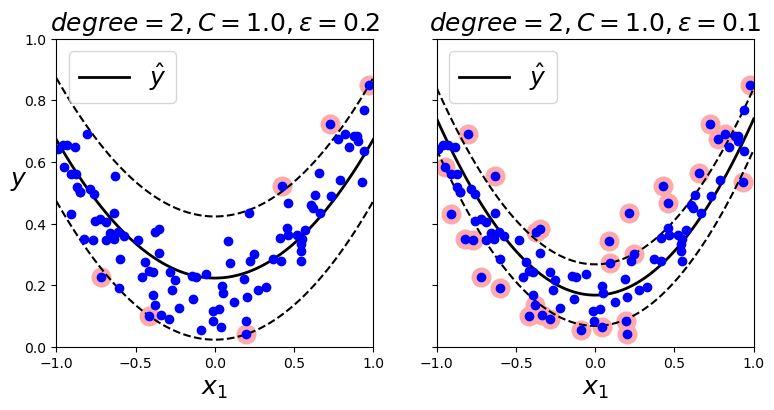

In [84]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=1.0, epsilon=0.2, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=1.0, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon = {svm_poly_reg1.epsilon}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon = {svm_poly_reg2.epsilon}$", fontsize=18)
plt.show()

### 이상치 탐지와 SVM

[책 참조 링크](https://goo.gl/cqU71e)

> novelty detection: 
> + 이전에 보지 못한 비 정상적 데이터 탐지 (훈련 데이터가 이상치로 오염되어 있지 않아야 함)   

> outlier detection: 
> + novelty detection과 유사하지만 훈련 데이터 내에 이상치가 있음 
> + 이를 해결하는 일반적인 방법 중 하나는 정상 데이터는 우리가 알고 있는 분포를 따를 것으로 가정을 함

 One-class SVM을 사용함 
+ outlier에 민감해서 outlier detection 성능이 좋지는 않음
+ nu 파라미터 조정을 통해 아웃라이어를 다룰 수 있도록 튜닝 가능

```python
sklearn.svm.OneClassSVM(
    kernel, 
    degree, 
    gamma, 
    coef0, 
    tol, 
    nu, # margin 
    shrinking, 
    cache_size, 
    verbose, 
    max_iter
)
```



### 결정 함수와 예측

$\hat{y} = 
\begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b < 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}$

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
from sklearnex import patch_sklearn, unpatch_sklearn

patch_sklearn()

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=100, loss="hinge", random_state=42)
scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])
scaled_svm_clf.fit(X, y)

b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b])
svm_clf.coef_ = np.array([w])

t = y * 2 - 1 # t {-1, 1}
support_vectors_idx = (t * (X.dot(w) + b) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx]

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/conda/envs/intelex/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


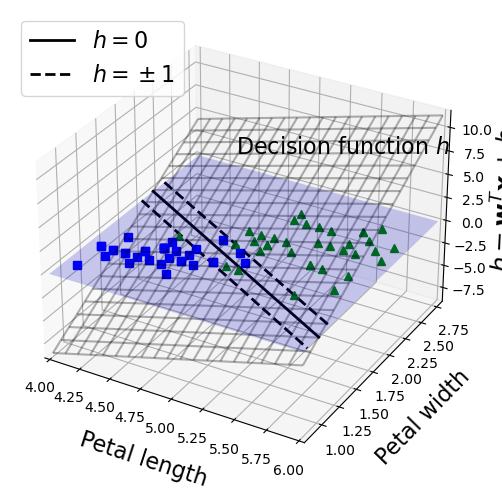

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf.coef_[0], b=svm_clf.intercept_[0])

plt.show()

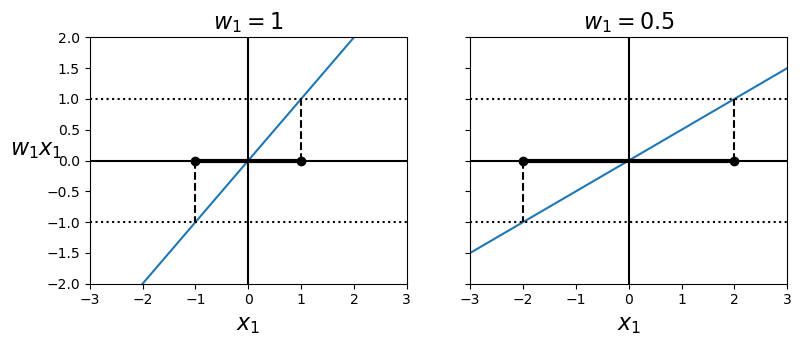

In [17]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

In [19]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

> 하드 마진 SVM 목적 함수
$$\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}$$

> $||\mathbf{w}||$ 의 경우   
   
$$
\begin{aligned}
\frac{d||\mathbf{w}||}{d\mathbf{w}} 
&= (\frac{d\sqrt{w_1^2+w_2^2}}{dw_1}, \frac{d\sqrt{w_1^2+w_2^2}}{dw_2}) \\
&= (\frac{1}{2}\cdot( \sqrt{w_1^2+w_2^2} )^{-\frac{1}{2}}\cdot 2w_1,  \frac{1}{2}\cdot( \sqrt{w_1^2+w_2^2} )^{-\frac{1}{2}}\cdot 2w_2)
\end{aligned}
$$

> $\frac{1}{2}||\mathbf{w}||^2$ 의 경우   

$$
\begin{aligned}
\frac{d\frac{1}{2}||\mathbf{w}||^2}{d\mathbf{w}} 
&= (\frac{d\frac{1}{2}(\sqrt{w_1^2+w_2^2})^2}{dw_1}, \frac{d\frac{1}{2}(\sqrt{w_1^2+w_2^2})^2}{dw_2}) \\
&= (\frac{d\frac{1}{2}(w_1^2+w_2^2)}{dw_1}, \frac{d\frac{1}{2}(w_1^2+w_2^2)}{dw_2}) \\
&= (\frac{1}{2}\cdot 2w_1, \frac{1}{2}\cdot 2w_2) \\
&= (w_1, w_2) \\
&= \mathbf{w} 
\end{aligned}

$$

> 소프트 마진 SVM 목적 함수
$$\begin{split}
&\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m 
\end{split}$$

+ 마진을 크게 하기 위해 $\mathbf{w}$ 를 작게 함 $\leftrightarrow$ 마진 오류를 최소화 하기 위해 $\zeta$를 작게 함

+ $C$가 크면 
  + $\mathbf{w}$가 자유로워짐 -> 모델이 복잡해짐
  + $\zeta$는 작아짐
+ $C$가 작으면 
  + $\mathbf{w}$ 제약이 커짐 -> 모델이 단순해짐
  + $\zeta$ 범위 넓어짐



### 콰드라틱 프로그래밍

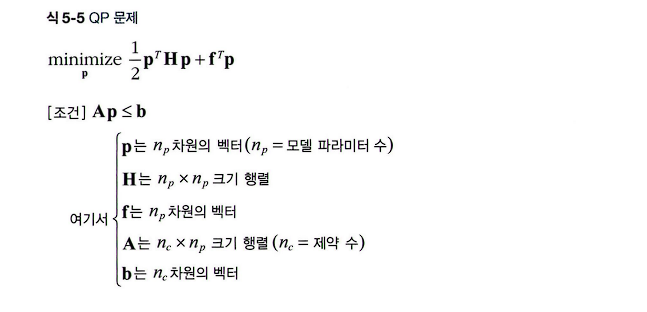

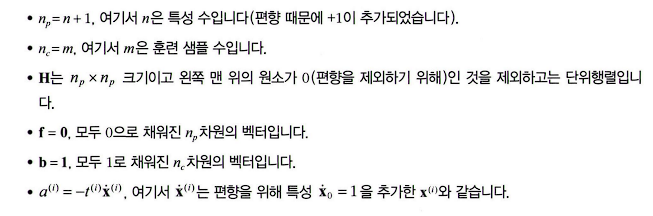

In [93]:
from IPython.display import Image
from IPython.display import display
a = Image(filename='./images/ch5_qp1.png', width=600)
b = Image(filename='./images/ch5_qp2.png', width=600)
display(a, b)

### 쌍대문제

> SVM이 풀고자 하는 primal problem은 제약조건이 있는 최소화 문제    
> $\min\limits_{\mathbf{w}, b}\{\frac{||w||^2}{2}\} \quad s.t. \; i=1,\dots,m \text{일 때, }\; t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b) \geq 1$ 입니다.   
> 원래 문제를 KKT 조건 하 라그랑주 승수법을 통해 최대화 문제 dual problem으로 바꿔도 원래의 문제의 해와 동일한 해를 구할 수 있다고 합니다.   
> $\mathfrak{L}(\mathbf{w}, b, \alpha)$ 최적화 문제를 $Q(\alpha)$ 최적화 문제로 변화시켜 풀 수 있다는 내용 입니다.

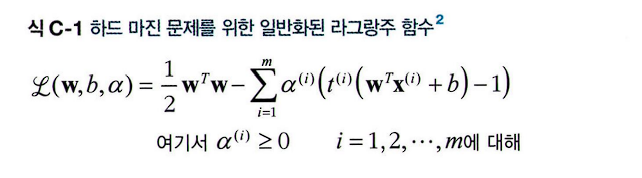

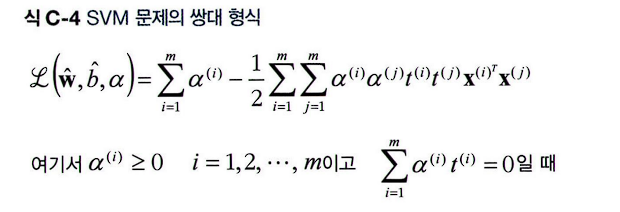

In [94]:
a = Image(filename='./images/ch5_dp1.png', width=600)
b = Image(filename='./images/ch5_dp2.png', width=600)
display(a, b)

> primal problem 라그랑주 함수
$$
\begin{aligned}
\min  L &= \frac{||\mathbf{w}^2||}{2} –  \sum_{i=1}^n \alpha^{(i)} (t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b)-1) \\
&= \frac{||\mathbf{w}^2||}{2} + \sum_{i=1}^n \alpha^{(i)} (1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b))
\end{aligned}
$$

> KKT 조건
$$
\begin{align}
\alpha^{(i)} (1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b)) =& 0  \text{    ,        } \forall i = 1..n \\
(1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b)) \leq & 0 \text{    ,        } \forall i = 1..n \\
\alpha^{(i)} \geq & 0 \text{    ,        } \forall i = 1..n \\
\frac{dL}{d\mathbf{w}} =& 0 \\
\frac{dL}{db} =& 0
\end{align}
$$


> 라그랑주 함수 편미분 $\mathbf{w}$, $b$
$$
\begin{aligned}
L 
&= \frac{||\mathbf{w}^2||}{2} –  \sum_{i=1}^n \alpha^{(i)} (t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)}+b)-1) \\
&= \frac{1}{2} \mathbf{w}^T\mathbf{w} –  \sum_{i=1}^n \alpha^{(i)} t^{(i)}\mathbf{w}^T \mathbf{x}^{(i)} – \sum_{i=1}^n \alpha^{(i)} t^{(i)}b + \sum_{i=1}^n \alpha^{(i)} \\
\end{aligned}
$$
+ $\mathbf{w}$ 편미분
$$
\begin{aligned}
\frac{dL}{d\mathbf{w}} &= \mathbf{w} –  \sum_{i=1}^n \alpha^{(i)} t^{(i)} \mathbf{x}^{(i)} = 0 \\
\mathbf{w} &=  \sum_{i=1}^n \alpha^{(i)} t^{(i)} \mathbf{x}^{(i)} \\
\end{aligned}
$$
+ $b$ 편미분
$$
\frac{dL}{db} = \sum_{i=1}^n \alpha^{(i)} t^{(i)} = 0
$$

> 듀얼 라그랑지안 목적 함수 
$$
\begin{aligned}
L_{dual} 
&= \frac{||\mathbf{w}^2||}{2} –  \sum_{i=1}^n \alpha^{(i)} (t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)}+b)-1) \\
&= \frac{1}{2} \mathbf{w}^T\mathbf{w} –  \sum_{i=1}^n \alpha^{(i)} t^{(i)}\mathbf{w}^T \mathbf{x}^{(i)} – \sum_{i=1}^n \alpha^{(i)} t^{(i)}b + \sum_{i=1}^n \alpha^{(i)} \\
&= \frac{1}{2} \mathbf{w}^T\mathbf{w} –  \mathbf{w}^T \Big ( \sum_{i=1}^n \alpha^{(i)} t^{(i)}\mathbf{x}^{(i)} \Big ) – b \Big ( \sum_{i=1}^n \alpha^{(i)} t^{(i)} \Big ) + \sum_{i=1}^n \alpha^{(i)} \\
&= \frac{1}{2} \mathbf{w}^T\mathbf{w} –  \mathbf{w}^T \Big ( \mathbf{w} \Big ) – b \Big ( 0 \Big ) + \sum_{i=1}^n \alpha^{(i)} \\
&= – \frac{1}{2} \mathbf{w}^T\mathbf{w} + \sum_{i=1}^n \alpha^{(i)} \\
&= \sum_{i=1}^n \alpha^{(i)} – \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha^{(i)} \alpha^{(j)} t^{(i)}t^{(j)}\mathbf{x}^{(i)^T}\mathbf{x}^{(j)}
\end{aligned}
$$

> dual problem
$$
\max_{\alpha} L_{dual} = \sum_{i=1}^n \alpha^{(i)} – \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha^{(i)} \alpha^{(j)} t^{(i)}t^{(j)}\mathbf{x}^{(i)^T}\mathbf{x}^{(j)} \\
s.t. \quad \alpha_i \geq 0, \text{ and } \sum_{i=1}^n \alpha^{(i)} t^{(i)} = 0
$$


> KKT 조건 (1)
$$\alpha^{(i)} (1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b)) = 0$$

> 위 조건을 만족하려면
+ $\alpha^{(i)} = 0$ 또는
+ $1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b) = 0$

**supoort vector 만을 가지고 $\mathbf{w}, b$를 계산 가능**


> 다항식 매핑
$$\phi\left(\mathbf{x}\right) = \phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = \begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}$$

> 커널 트릭과 다항식 매핑
$$\begin{split}
\phi(\mathbf{a})^T \phi(\mathbf{b}) & \quad = \begin{pmatrix}
  {a_1}^2 \\
  \sqrt{2} \, a_1 a_2 \\
  {a_2}^2
  \end{pmatrix}^T \begin{pmatrix}
  {b_1}^2 \\
  \sqrt{2} \, b_1 b_2 \\
  {b_2}^2
\end{pmatrix} = {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
 & \quad = \left( a_1 b_1 + a_2 b_2 \right)^2 = \left( \begin{pmatrix}
  a_1 \\
  a_2
\end{pmatrix}^T \begin{pmatrix}
    b_1 \\
    b_2
  \end{pmatrix} \right)^2 = (\mathbf{a}^T \mathbf{b})^2
\end{split}$$

> 일반적인 커널
$$\begin{split}
\text{선형:} & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{다항식:} & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{가우시안 RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = \exp({\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}) \\
\text{시그모이드:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}$$

> 선형 SVM 분류기의 비용 함수
$$J(\mathbf{w}, b) = \dfrac{1}{2} \mathbf{w}^T \mathbf{w} \,+\, C {\displaystyle \sum\limits_{i=1}^{m}max\left(0, t^{(i)} - (\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)}$$

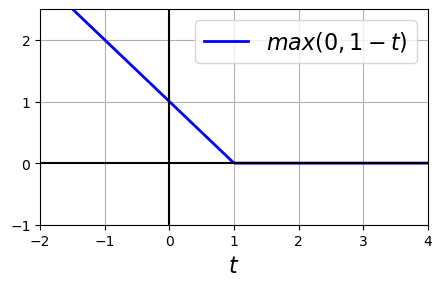

In [20]:
# 힌지 손실 그림
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

### 훈련 시간

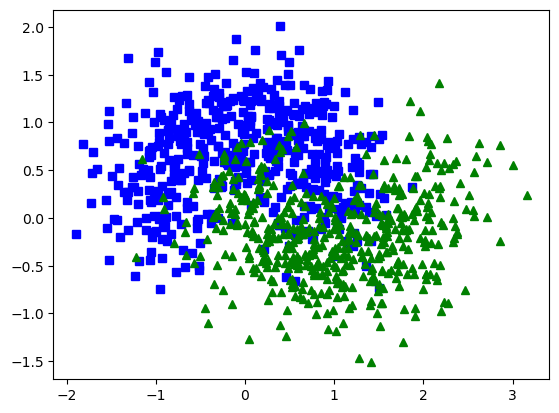

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.show()

0 0.1 0.5861239433288574
1 0.01 0.4902224540710449
2 0.001 0.521355390548706
3 0.0001 0.5160977840423584
4 1e-05 0.5400497913360596
5 1.0000000000000002e-06 0.4958934783935547
6 1.0000000000000002e-07 0.5617930889129639
7 1.0000000000000002e-08 0.654106616973877
8 1.0000000000000003e-09 0.511939287185669
9 1.0000000000000003e-10 0.536893367767334


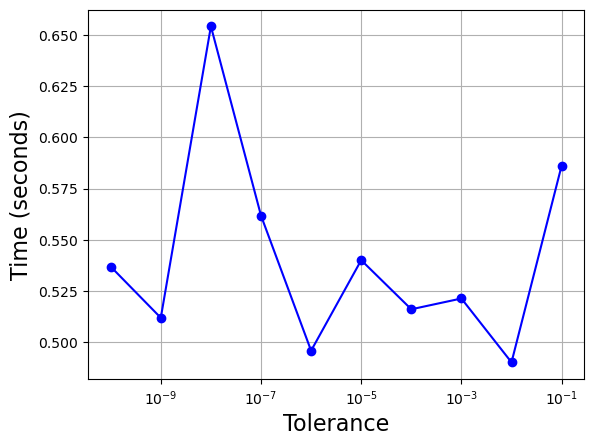

In [22]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

### 배치 경사 하강법과 선형 SVM 분류기

In [35]:
# 훈련 세트
X = iris["data"][:, (2, 3)] # # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

In [36]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if y==0, +1 if y==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

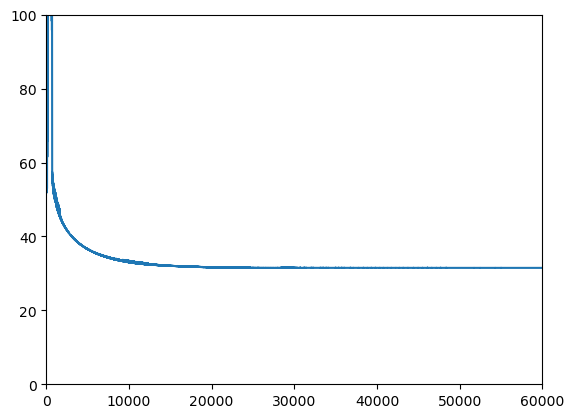

In [38]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.show()

In [39]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [40]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51722772] [[2.27128713 2.71287129]]


In [41]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

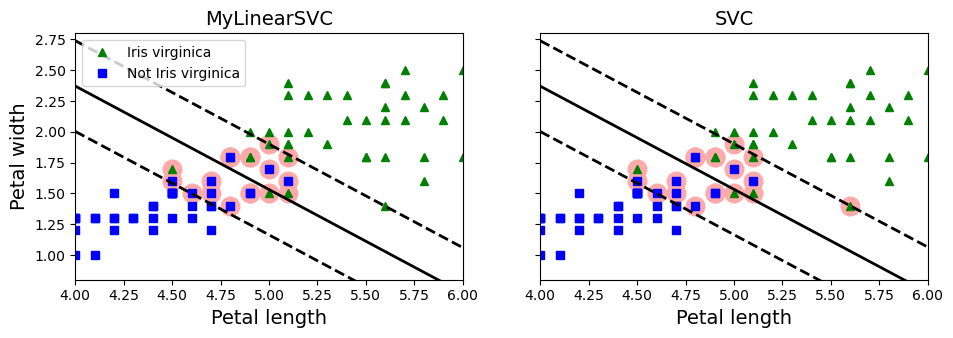

In [42]:
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.show()

[-12.52988101   1.94162342   1.84544824]


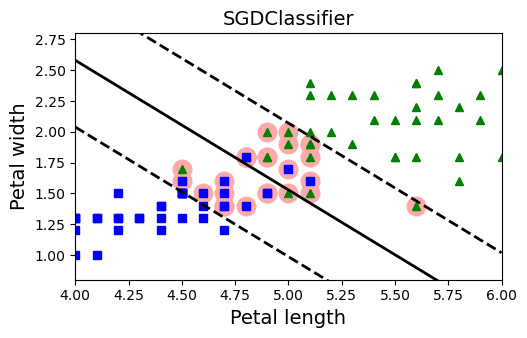

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y.ravel())

m = len(X)
t = y * 2 - 1  # y==0이면 -1, y==1이면 +1
X_b = np.c_[np.ones((m, 1)), X]  # 편향 x0=1을 추가합니다
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.show()